https://fleuret.org/dlc/materials/dlc-slides-7-4-VAE.pdf (ref)

In [ ]:
import torch
from torch import nn 
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from datasets import load_dataset
from torch.utils.data import default_collate, DataLoader
import matplotlib.pyplot as plt

In [ ]:
def transform(b):
    b['image'] = [TF.to_tensor(o) for o in b['image']]
    return b

def collate_dict(b):
    c = default_collate(b)
    return (c['image'], c['label'])

bs = 100

data = load_dataset('mnist')
train_data, valid_data = data['train'].with_transform(transform), data['test'].with_transform(transform)
train_dl = DataLoader(train_data, batch_size=bs, shuffle=True, collate_fn=collate_dict) 
valid_dl = DataLoader(valid_data, batch_size=bs*2, shuffle=False, collate_fn=collate_dict)

Found cached dataset mnist (/Users/arun/.cache/huggingface/datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332)


  0%|          | 0/2 [00:00<?, ?it/s]

torch.Size([100, 1, 28, 28]) torch.Size([100])


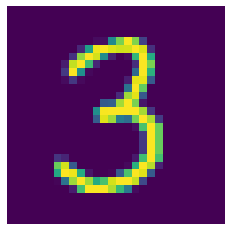

In [ ]:
xb,yb = next(iter(train_dl))
print(xb.shape, yb.shape)
plt.imshow(xb[0].permute(1,2,0));
plt.axis('off');